In [1]:
import pandas as pd

# Load the dataset
file_path = 'beverage.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to explore its structure
data.head()


,juice,sweet
0,2.1041,0.8901
1,-1.0617,-0.4111
2,0.3521,-1.7488
3,-0.1962,2.5952
4,1.4158,1.0928


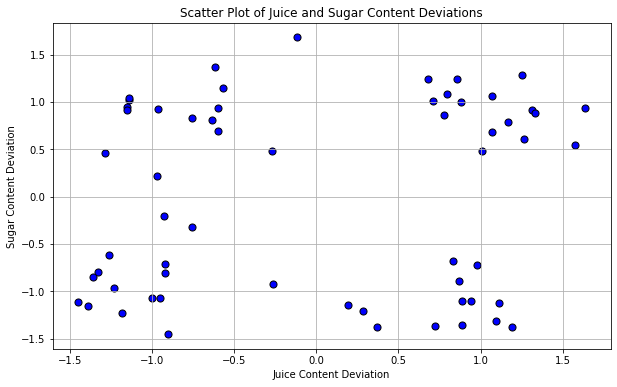

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Convert the data into an array format
data_array = data.values

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)

# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.xlabel('Juice Content Deviation')
plt.ylabel('Sugar Content Deviation')
plt.title('Scatter Plot of Juice and Sugar Content Deviations')
plt.grid(True)
plt.show()


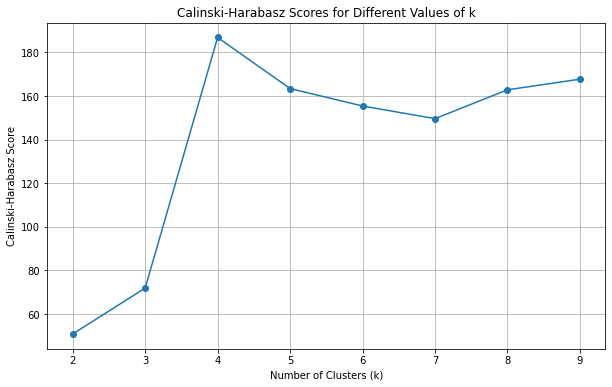

([50.84119868306571,
  71.87863707005381,
  186.82534952993592,
  163.39087286940025,
  155.39206461444212,
  149.59161675362367,
  162.82876751064583,
  167.6920309289987],
 [array([[ 0.17615915,  0.90587561],
         [-0.19503335, -1.00293371]]),
  array([[ 0.72153408, -1.12137208],
         [-0.97822762, -0.0216062 ],
         [ 1.0169939 ,  0.95906957]]),
  array([[ 0.79740949, -1.13620543],
         [-0.79641676,  0.89721052],
         [ 1.08794908,  0.91399912],
         [-1.05515047, -0.88743155]]),
  array([[ 0.79740949, -1.13620543],
         [-0.98501444,  0.03944218],
         [ 1.08794908,  0.91399912],
         [-1.08824702, -0.98377248],
         [-0.74509534,  0.98291986]]),
  array([[ 0.95158685, -1.10386117],
         [-0.84161448,  0.12719991],
         [ 1.08794908,  0.91399912],
         [-1.15686376, -0.98837532],
         [-0.78485207,  1.02497728],
         [ 0.14640214, -1.16514933]]),
  array([[ 1.08794908,  0.91399912],
         [-0.95507297, -0.53164115],
  

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import numpy as np

# Range of k values to try
k_values = range(2, 10)

# To store the results
calinski_harabasz_scores = []
cluster_centers = []
labels_list = []

for k in k_values:
    # Configure and train the K-Means model
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data_scaled)

    # Calculate Calinski-Harabasz score
    ch_score = calinski_harabasz_score(data_scaled, labels)
    calinski_harabasz_scores.append(ch_score)

    # Store cluster centers and labels
    cluster_centers.append(kmeans.cluster_centers_)
    labels_list.append(labels)

# Plotting the Calinski-Harabasz scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Different Values of k')
plt.grid(True)
plt.show()

(calinski_harabasz_scores, cluster_centers, labels_list)


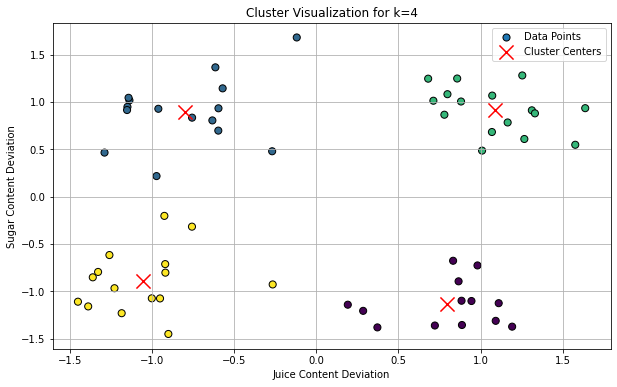

In [4]:
# Selecting the cluster labels and centers for k = 4
k = 4
labels_k4 = labels_list[k_values.index(k)]
cluster_centers_k4 = cluster_centers[k_values.index(k)]

# Visualizing the clusters and their centers
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_k4, s=50, cmap='viridis', marker='o', edgecolor='black', label='Data Points')
plt.scatter(cluster_centers_k4[:, 0], cluster_centers_k4[:, 1], s=200, c='red', marker='x', edgecolor='black', label='Cluster Centers')
plt.xlabel('Juice Content Deviation')
plt.ylabel('Sugar Content Deviation')
plt.title('Cluster Visualization for k=4')
plt.legend()
plt.grid(True)
plt.show()
